In [30]:
#digit recognition  using ANN
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical,plot_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from warnings import filterwarnings
filterwarnings("ignore")



In [31]:
#loading the mnist dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print("training set size:",x_train.shape,y_train.shape)
print("test set size:",x_test.shape,y_test.shape)





training set size: (60000, 28, 28) (60000,)
test set size: (10000, 28, 28) (10000,)


In [32]:
#number of classes
num_labels=len(np.unique(y_train))
num_labels

10

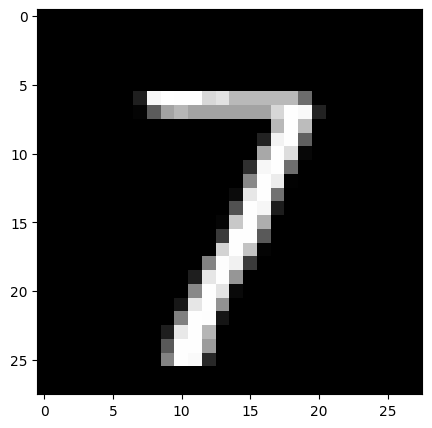

In [33]:
#showing example from dataset
plt.figure(figsize=(5,5))
plt.imshow(x_train[560],cmap="gray")

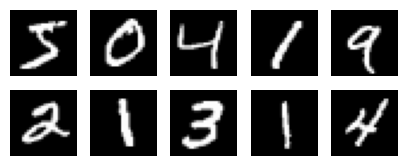

In [34]:
plt.figure(figsize=(5,5))
for i in range(0,10):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap="gray")
    plt.axis("off")

In [35]:
def visualize_img(date,num=10):
    plt.figure(figsize=(5,5))
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(date[i],cmap="gray")
        plt.axis("off")

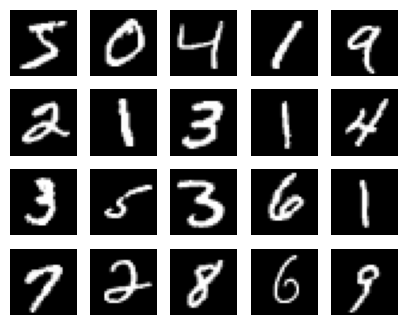

In [36]:
visualize_img(x_train,20)

In [37]:
def pixel_visualize(img):
    fig= plt.figure(figsize=(12,12))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap="gray")
    width,height=img.shape

    threshold=img.max()/2.5
    
    for x in range(width):
     for y in range(height):
         ax.annotate(str(round(img[x][y],2)),xy=(y,x),color="white"if img[x][y]<threshold else "black")
         
        

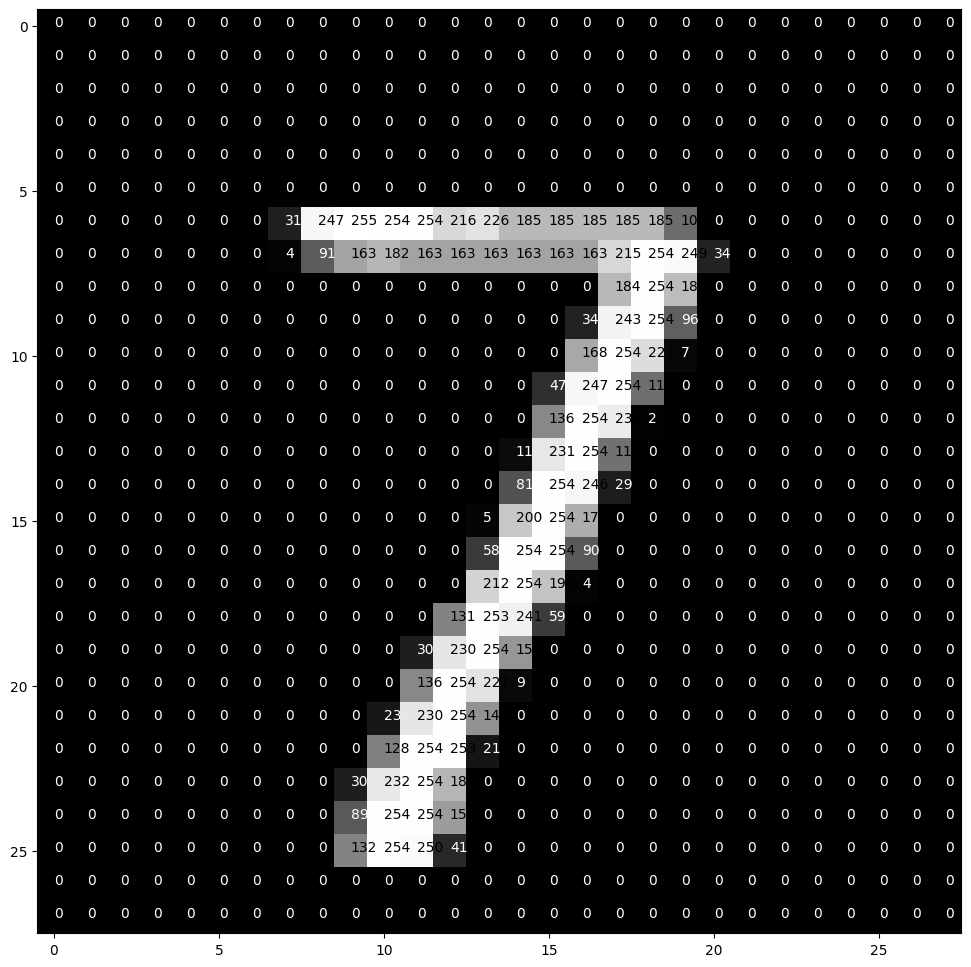

In [38]:
pixel_visualize(x_train[560])

In [39]:
#data preparation
#encoding for dependent vatriable

#before encoding
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [40]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [41]:
#how classes ate expressed after encoding(one hot encoding)
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [42]:
#reshaping

image_size=x_train.shape[1]
image_size

28

In [43]:
print(f"x_train size:{x_train.shape}\n\nx_test size:{x_test.shape}")


x_train size:(60000, 28, 28)

x_test size:(10000, 28, 28)


In [44]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)



In [45]:
print(f"x_train size:{x_train.shape}\n\nx_test size:{x_test.shape}")


x_train size:(60000, 28, 28, 1)

x_test size:(10000, 28, 28, 1)


In [46]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255


In [47]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [48]:
#modeling
#defining neural networks architecture

model=tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128,activation="relu",name="layer1"),
    Dense(units=num_labels,activation="softmax",name="output_layer")])

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])
    

In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
#model fit

model.fit(x_train,y_train,epochs=8,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8306 - loss: 0.6243 - precision_1: 0.9334 - recall_1: 0.6978 - val_accuracy: 0.9444 - val_loss: 0.1980 - val_precision_1: 0.9561 - val_recall_1: 0.9285
Epoch 2/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9493 - loss: 0.1769 - precision_1: 0.9620 - recall_1: 0.9375 - val_accuracy: 0.9603 - val_loss: 0.1332 - val_precision_1: 0.9695 - val_recall_1: 0.9524
Epoch 3/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9637 - loss: 0.1219 - precision_1: 0.9724 - recall_1: 0.9577 - val_accuracy: 0.9661 - val_loss: 0.1091 - val_precision_1: 0.9725 - val_recall_1: 0.9608
Epoch 4/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9743 - loss: 0.0909 - precision_1: 0.9797 - recall_1: 0.9691 - val_accuracy: 0.9706 - val_loss: 0.0995 - val_precision_1: 0.9760 - val_recall_1: 0.9661
Epoch 5/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9795 - loss: 0.0711 - precision_1: 0.9835 - recall_1: 0.9757 - val_

In [51]:
#model evaluation

history=model.fit(x_train,y_train,epochs=8,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9911 - loss: 0.0337 - precision_1: 0.9927 - recall_1: 0.9897 - val_accuracy: 0.9787 - val_loss: 0.0697 - val_precision_1: 0.9807 - val_recall_1: 0.9762
Epoch 2/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9923 - loss: 0.0290 - precision_1: 0.9936 - recall_1: 0.9910 - val_accuracy: 0.9776 - val_loss: 0.0727 - val_precision_1: 0.9797 - val_recall_1: 0.9755
Epoch 3/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9935 - loss: 0.0255 - precision_1: 0.9943 - recall_1: 0.9925 - val_accuracy: 0.9788 - val_loss: 0.0664 - val_precision_1: 0.9825 - val_recall_1: 0.9769
Epoch 4/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9955 - loss: 0.0193 - precision_1: 0.9963 - recall_1: 0.9944 - val_accuracy: 0.9797 - val_loss: 0.0652 - val_precision_1: 0.9819 - val_recall_1: 0.9777
Epoch 5/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9958 - loss: 0.0185 - precision_1: 0.9962 - recall_1: 0.9950 - val_

Text(0.5, 1.0, 'training and test accuracy graph')

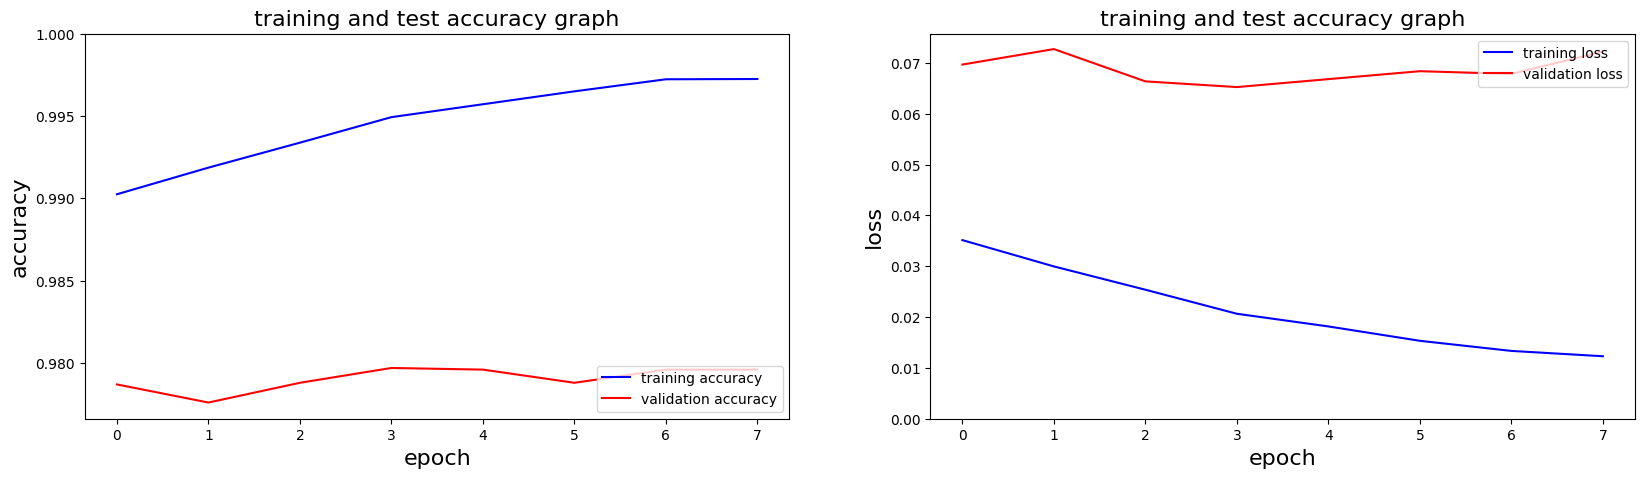

In [52]:
#accuracy and loss fun

#accuracy

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],color='b',label='training accuracy')
plt.plot(history.history['val_accuracy'],color='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.xlabel('epoch',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('training and test accuracy graph',fontsize=16)

#loss

plt.subplot(1,2,2)
plt.plot(history.history['loss'],color='b',label='training loss')
plt.plot(history.history['val_loss'],color='r',label='validation loss')
plt.legend(loc='upper right')
plt.xlabel('epoch',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('training and test accuracy graph',fontsize=16)




In [53]:
loss,precision,recall,acc=model.evaluate(x_test,y_test,verbose=False)
print(f" test accuracy:{round(acc*100,2)}")
print(f" test loss:{round(loss*100,2)}")
print(f" test precision:{round(precision*100,2)}")
print(f" test recall:{round(recall*100,2)}")

 test accuracy:97.96
 test loss:7.22
 test precision:98.09
 test recall:97.86


In [54]:
#precision and visualization

y_pred=model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [55]:
y_pred_classes=np.argmax(y_pred,axis=1)



In [56]:
if len(y_test.shape)>1 and y_test.shape[1]!=1:
    y_test=np.argmax(y_test,axis=1)

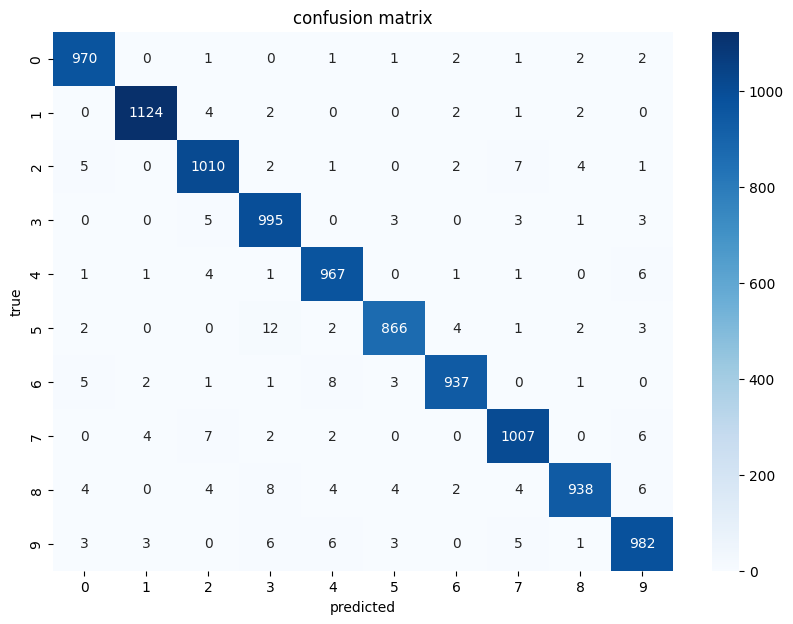

In [57]:
#confusion matrix

cm=confusion_matrix(y_test,y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('confusion matrix')
plt.show()

In [ ]:
#registering the model and preducting a Randomly selected uimage for dataset

model.save("mnist_model.h5")

In [64]:
import random
random=random.randint(0,x_test.shape[0])
print(y_test[random])
test_image=x_test[random]
print(y_test[random])

1
1


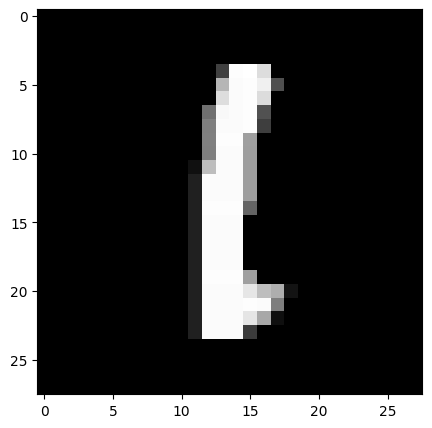

In [65]:
plt.figure(figsize=(5,5))
plt.imshow(test_image.reshape(28,28),cmap="gray")


In [66]:
test_data=x_test[random].reshape(1,28,28,1)

In [62]:
probability=model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [63]:
predicted_classes=np.argmax(probability)

In [67]:
print(f"predicted class:{predicted_classes}\nprobability value of predicted class:{np.max(probability,axis=-1)[0]}\nprobability value of predicted classes:{probability} ")

predicted class:1
probability value of predicted class:0.9994327425956726
probability value of predicted classes:[[3.8406527e-09 9.9943274e-01 2.3271323e-06 5.6449255e-07 1.5923097e-05
  2.1455615e-09 8.3507977e-08 4.6054556e-04 8.7526263e-05 2.0752366e-07]] 
